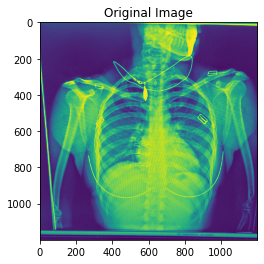

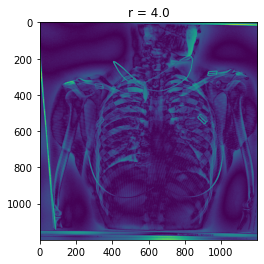

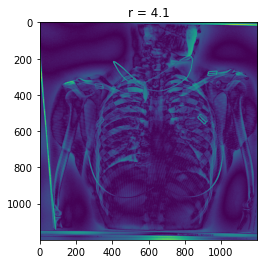

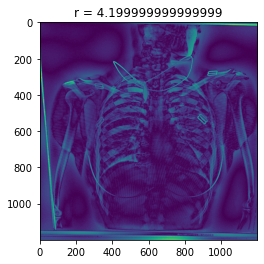

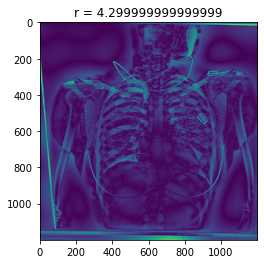

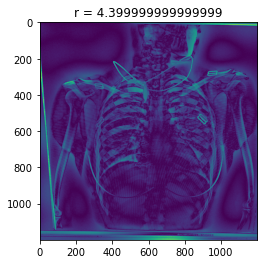

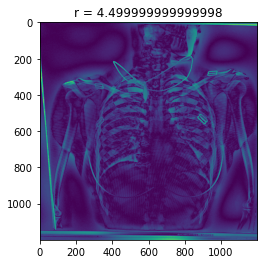

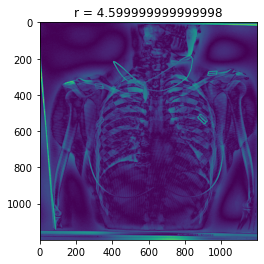

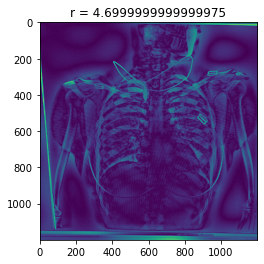

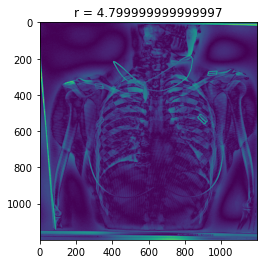

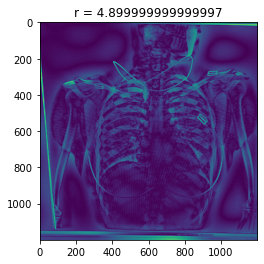

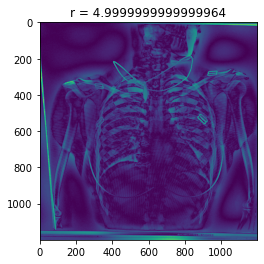

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read image
image = cv2.imread('Q79057.jpg', 0)
img = np.asarray(image)

plt.figure(1)
plt.imshow(image)
plt.title('Original Image')

# FFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

# center of image
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

figNo = 2
# create mask - circular filter
for r in np.arange(4.0,5.1,0.1):
    mask = np.ones((rows, cols, 2), np.uint8)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
    mask[mask_area] = 0

    # apply filter
    fshift = dft_shift * mask

    # return to spatial domain
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

    plt.figure(figNo)
    plt.imshow(img_back)
    plt.title('r = ' + str(r))
    figNo = figNo + 1

<ipython-input-48-004bfa6e9656>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figNo)


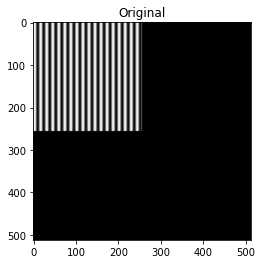

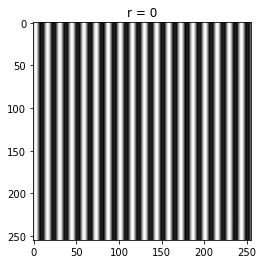

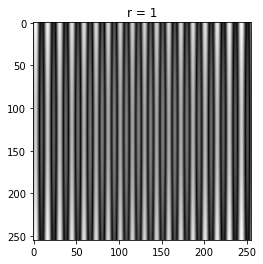

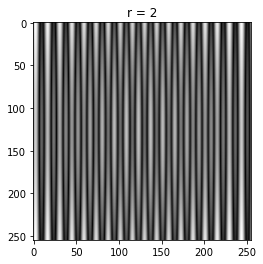

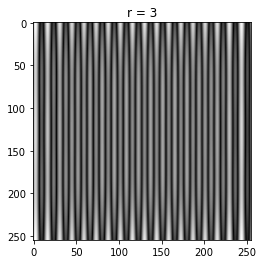

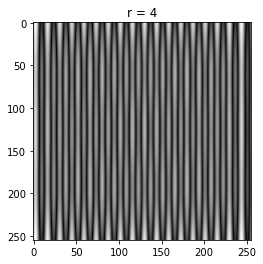

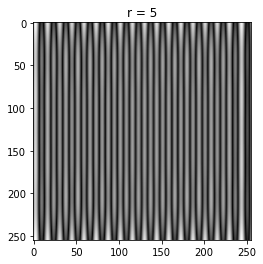

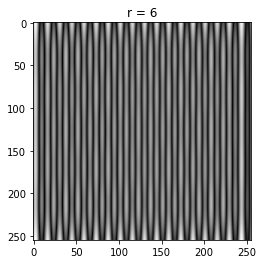

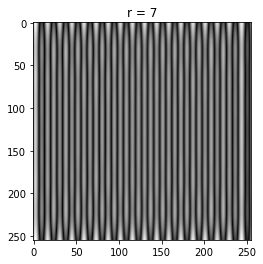

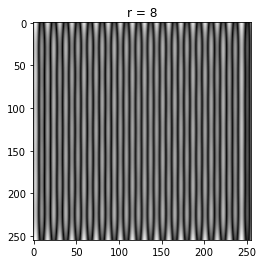

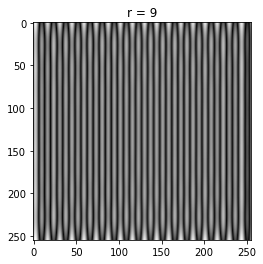

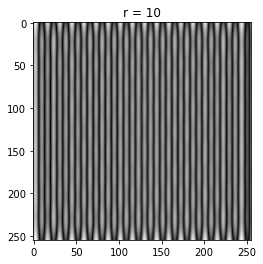

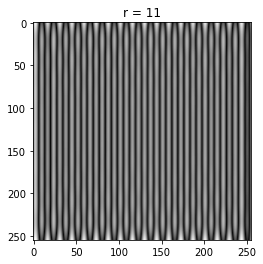

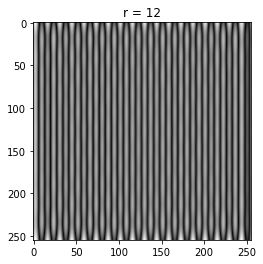

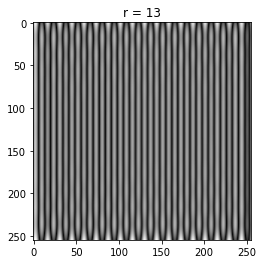

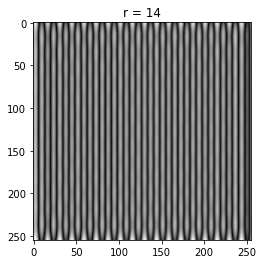

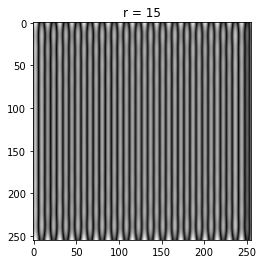

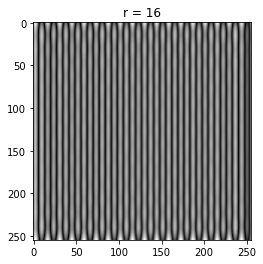

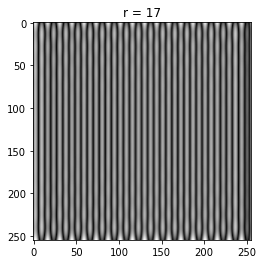

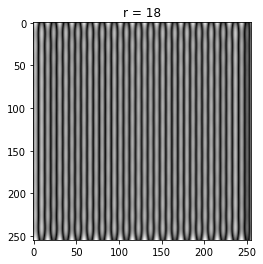

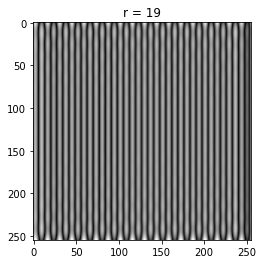

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filter_image(img, radius):
    # FFT
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 0.000000001)

    # center of image
    rows, cols = img.shape
    crow, ccol = int(rows/2), int(cols/2)

    # create mask - circular filter
    r = radius
    mask = np.ones((rows, cols, 2), np.uint8)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
    mask[mask_area] = 0

    # apply filter
    fshift = dft_shift * mask

    # return to spatial domain
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

    return img_back, mask, magnitude_spectrum

N = 256
x = np.linspace(-np.pi,np.pi, N)
sine1D = np.concatenate((128.0 + 127.0 * np.sin(x * 18.0), np.zeros(N)))
sine1D = np.uint8(sine1D)
sine2D = np.zeros((2*N,2*N), dtype=np.uint8)
for i in range(N):
    sine2D[i]= np.roll(sine1D,0)  # shift the 1D sin data by -i, -i increases with rows
#

figNo = 1
plt.figure(figNo)
plt.imshow(sine2D, cmap='gray')
plt.title('Original')
figNo += 1

for R in range(20):

    filt1, mask1, spec = filter_image(sine2D, R)
    
    plt.figure(figNo)
    plt.imshow(filt1[1:N,1:N], cmap='gray')
    plt.title('r = ' + str(R))
    figNo += 1
    
#     plt.figure(figNo)
#     plt.imshow(mask1[:,:,1], cmap='gray')
#     plt.title('r = ' + str(R))
#     figNo += 1
    
#     plt.figure(figNo)
#     plt.imshow(spec, cmap='gray')
#     plt.title('r = ' + str(R))
#     figNo += 1
    

In [49]:
print(np.array([1, 2, 3, 4, 5, 6], dtype=np.complex64))

[1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j]
